**Name: Yusuf Elnady**


# Imports

In [1]:
%matplotlib inline
import numpy as np
import sys
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from scipy.sparse.csgraph import dijkstra
from scipy.io import loadmat 
np.set_printoptions(threshold=sys.maxsize)
import seaborn as sns

# Problem 4

In [2]:
data = loadmat('data.mat')['X_data'].T

In [3]:
def constructGraph(data,k,d):
    N = data.shape[0]
    distmat = np.zeros([N,N]) #Reserve a space for the squared distance matrix
    for i in range(N):
        for j in range(N):
            #calculate the pairwise distance matrix using the eculidean distance
            distmat[i][j] = np.sqrt((data[i,0]-data[j,0])**2 +(data[i,1]-data[j,1])**2 + (data[i,2]-data[j,2])**2 )      
    knn_matrix = np.zeros((N,N))
    for i in range(N):
        #get the indices of the k-shortest pairwise distance in distmat
        inds = np.argpartition(distmat[i],k)[:k]
        for idx in inds:
            knn_matrix[i,idx]=1#distmat[i,idx]
            knn_matrix[idx,i]=1#distmat[i,idx]
    ecul_matrix = distmat <d - np.eye(N)#convert the distance matrix to a adjacency matrix
    knn_matrix = knn_matrix - np.eye(N)
    return distmat,knn_matrix,ecul_matrix

distmat,knn_matrix,ecul_matrix = constructGraph(data,5,6)
pd.DataFrame(distmat[:8,:8])    


,0,1,2,3,4,5,6,7
0,0.000000,19.785404,18.106390,15.303795,16.152285,9.020344,20.270749,23.205982
1,19.785404,0.000000,16.302516,20.059622,6.049194,18.741645,3.729406,27.115826
2,18.106390,16.302516,0.000000,15.545197,16.331315,23.908451,19.658936,13.989015
3,15.303795,20.059622,15.545197,0.000000,20.975731,20.904075,21.736345,13.203144
4,16.152285,6.049194,16.331315,20.975731,0.000000,14.554975,6.479995,28.031548
5,9.020344,18.741645,23.908451,20.904075,14.554975,0.000000,17.542457,30.944231
6,20.270749,3.729406,19.658936,21.736345,6.479995,17.542457,0.000000,30.048003
7,23.205982,27.115826,13.989015,13.203144,28.031548,30.944231,30.048003,0.000000


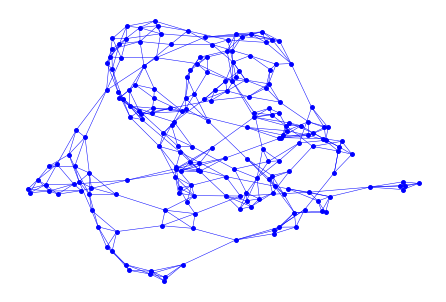

In [336]:
X = nx.from_numpy_matrix(knn_matrix) #convert the adjacency matrix to a nx matrix so it can be plotted
nx.draw(X,node_size=15,width =0.5,edge_color='b',node_color='b')
plt.savefig("4")

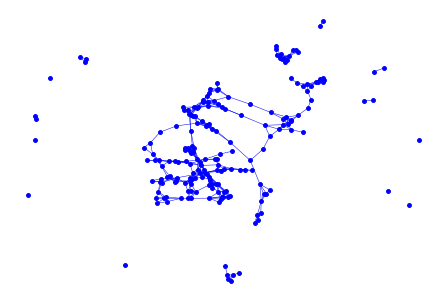

In [337]:
X = nx.from_numpy_matrix(ecul_matrix) #convert the adjacency matrix to a nx matrix so it can be plotted
nx.draw(X,node_size=15,width =0.5,edge_color='b',node_color='b')
plt.savefig("4")

In [338]:
#We better calculate the geodesic distance using a matrix of knn neighbors, a good number may be 3
def geodist(distmat,neighborsmat):
    #we want a matrix of only the connected neighbor points together, we multiplied by distmat so it is not only 
    # consisted of 1s, but also of the actual distmat values
    x = np.multiply(distmat,neighborsmat) 
    g = dijkstra(x,directed=False)
    return g


#I want to send only the first 8 points, but with all of its 3 features, so [:8,:]
#Originally I have 200 rows, each with 3 features/columns only
distmat,knn_matrix,ecul_matrix=constructGraph(data[:8,:],d=6,k=3)
g = geodist(distmat,knn_matrix)
pd.DataFrame(g)

,0,1,2,3,4,5,6,7
0,0.000000,29.624514,30.848992,15.303795,23.575319,9.020344,30.055315,28.506939
1,29.624514,0.000000,60.473505,44.928308,6.049194,20.604169,3.729406,58.131453
2,30.848992,60.473505,0.000000,15.545197,54.424311,39.869336,60.904306,13.989015
3,15.303795,44.928308,15.545197,0.000000,38.879114,24.324139,45.359109,13.203144
4,23.575319,6.049194,54.424311,38.879114,0.000000,14.554975,6.479995,52.082258
5,9.020344,20.604169,39.869336,24.324139,14.554975,0.000000,21.034970,37.527283
6,30.055315,3.729406,60.904306,45.359109,6.479995,21.034970,0.000000,58.562254
7,28.506939,58.131453,13.989015,13.203144,52.082258,37.527283,58.562254,0.000000


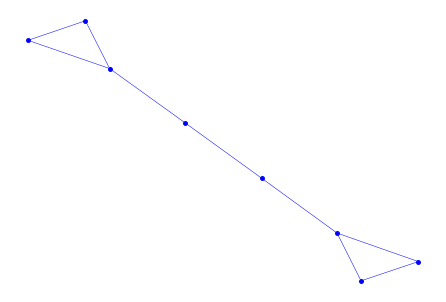

In [339]:
X = nx.from_numpy_matrix(knn_matrix) #convert the adjacency matrix to a nx matrix so it can be plotted
nx.draw(X,node_size=15,width =0.5,edge_color='b',node_color='b')

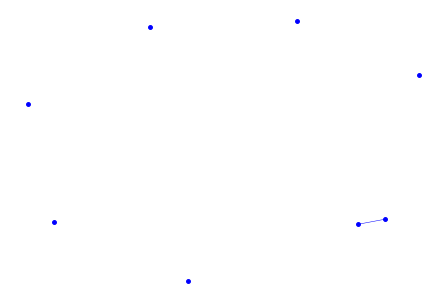

In [340]:
X = nx.from_numpy_matrix(ecul_matrix) #convert the adjacency matrix to a nx matrix so it can be plotted
nx.draw(X,node_size=15,width =0.5,edge_color='b',node_color='b')

# Problem 5

In [4]:
df = pd.read_csv('thick.csv')[:100]
df.drop(['Date.Time'],axis=1,inplace=True)

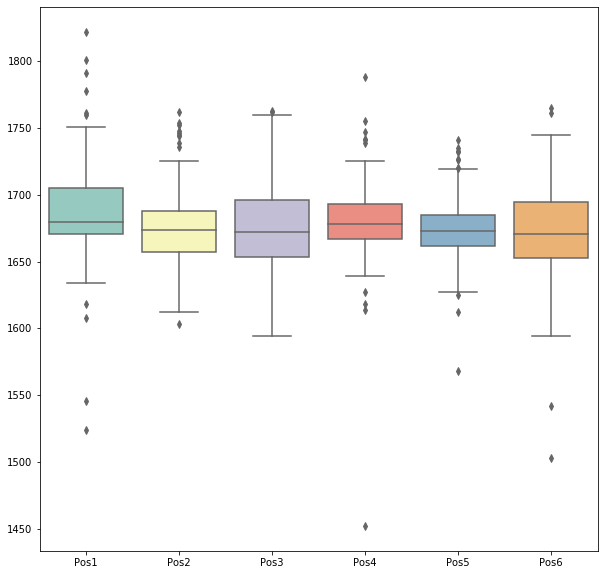

In [5]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(ax=ax,data=df, palette="Set3")
plt.savefig("5")

# Problem 6

In [38]:
#(1) Import the data file food.csv in python.
df = pd.read_csv("food.csv")
df.drop(df.columns[0],axis=1,inplace=True)
M = df.shape[0]

In [95]:
#(2) Centring
# stats.zscore(df), gives the same  
normalized = np.zeros(df.shape)
X = df.to_numpy()

for i in range(normalized.shape[1]):
    deviation = np.std(X[:,i])
    mean = np.mean(X[:,i])   #Get the mean of all rows for the column (i)
    normalized[:,i]= (X[:,i]-mean)/deviation


In [40]:
#(3) The answer is in the pdf file
#(4) Implement the correlation matrix
#we can calculate the correlation matrix using transpose since data is zero mean centered   
corr = np.matmul(normalized.T,normalized)/M  #we can easily call df.corr()
pd.DataFrame(corr)

,0,1,2,3,4
0,1.000000,-0.750024,0.593086,-0.533739,-0.096045
1,-0.750024,1.000000,-0.670946,0.572132,0.107937
2,0.593086,-0.670946,1.000000,-0.843965,0.411093
3,-0.533739,0.572132,-0.843965,1.000000,-0.373358
4,-0.096045,0.107937,0.411093,-0.373358,1.000000


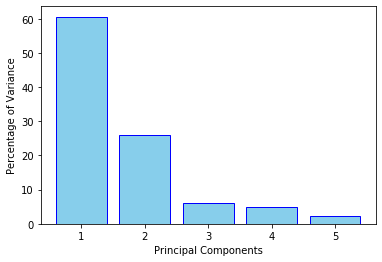

,0,1,2,3,4
0,1.000000,-0.750024,0.593086,-0.533739,-0.096045
1,-0.750024,1.000000,-0.670946,0.572132,0.107937
2,0.593086,-0.670946,1.000000,-0.843965,0.411093
3,-0.533739,0.572132,-0.843965,1.000000,-0.373358
4,-0.096045,0.107937,0.411093,-0.373358,1.000000


In [41]:
#(5) 

# Calculate the eigenvectors and eigenvalues of this square matrix.
eig_vals,eig_vecs= np.linalg.eig(corr)


#(6)
idxs = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[idxs]
eig_vecs = eig_vecs[idxs] #updating the order of the eigenvectors in the matrix

percentages  = [(eig_vals[i]*100)/eig_vals.sum() for i in range(len(eig_vals))]
y_pos = np.arange(len(percentages))
 
# Create bars
plt.bar(y_pos, height=percentages,color="skyblue",  edgecolor='blue' )
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Variance')

# Create names on the x-axis
plt.xticks(y_pos, y_pos+1)
# Show graphic
plt.show()
CORR_REFORMED = eig_vecs.dot(np.diag(eig_vals)).dot(eig_vecs.T)
pd.DataFrame(CORR_REFORMED)

[[ 1.39725427  0.62569463]
 [-2.82284799 -0.35731583]
 [-0.23996822 -0.87020421]
 [ 1.95902981  1.15332817]
 [ 1.28080985 -0.67020043]
 [-2.01773569 -1.31153586]
 [-1.50329665  0.63907552]
 [ 0.83727865  2.40673743]
 [ 1.19718563 -0.35373623]
 [ 1.00354879 -0.3543876 ]
 [-0.99484294  0.16138098]
 [-0.77543514 -1.20322788]
 [-2.21705531 -1.49942422]
 [ 0.85379081 -2.28296654]
 [ 2.2452386   1.60425202]
 [-1.88748062 -1.95650453]
 [-2.06008746  1.05626083]
 [-0.47664538 -0.64342825]
 [-1.58139044  0.3134875 ]
 [-2.77201685 -0.28845672]
 [ 2.35958463 -2.08819632]
 [ 1.55802122 -0.9324849 ]
 [-1.75857566 -0.58100315]
 [ 1.12197406  1.48450845]
 [-1.27824078 -0.74272096]
 [-0.99344525 -0.70264702]
 [ 1.5009033   0.68157805]
 [ 1.14413854  0.27086665]
 [-0.73218266 -0.18087962]
 [-1.57635709  2.53259106]
 [ 2.01218567 -0.11217135]
 [ 1.0149842   0.45960309]
 [ 4.21374977  0.77535504]
 [-0.8518119  -0.11291721]
 [ 0.09264148 -2.14355008]
 [-3.64635736  1.77725311]
 [-1.73848039  1.77440281]
 

Text(0, 0.5, 'Second Component')

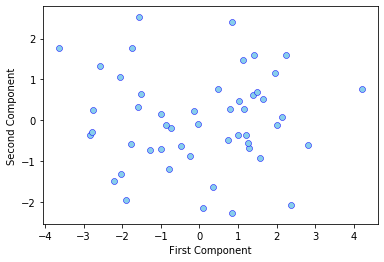

In [155]:
#(7)

#I would choose the first three Principal Components because they have a total variance of 92.739% which captures most of the data

#For plotting, I am going to choose only the first two Principal Components --> eig_vecs[:2]

# X.shape (50,5)
# eig_vecs[:2].shape (2,5)
#To project we need XVV^T
#the column v[:,i] is the eigenvector corresponding to the eigenvalue w[i].
two_eign = eig_vecs[:,:2]
projected_pca = normalized.dot(two_eign)
print(projected_pca)
#(8)
sns.scatterplot(x=projected_pca[:,0],y=projected_pca[:,1],color="skyblue",  edgecolor='blue')
plt.xlabel('First Component')
plt.ylabel('Second Component')


[[ 1.26369241  0.16371192]
 [-2.69817947 -0.99955301]
 [-0.19140242 -1.02866305]
 [ 1.79303972  1.41111194]
 [ 1.24839307 -0.09800083]
 [-1.75314327 -0.59032903]
 [-1.55436452  0.31322903]
 [ 0.69006084  1.79463095]
 [ 1.11084869 -0.38932635]
 [ 0.9605354  -0.1190829 ]
 [-0.99854819 -0.37713438]
 [-0.56982743 -0.76554101]
 [-2.139431   -1.45889895]
 [ 0.92464542 -2.03755202]
 [ 2.03864239  0.8011931 ]
 [-1.77693583 -1.30168731]
 [-2.11558169  1.14365573]
 [-0.45024235 -0.74083715]
 [-1.57088358 -0.54037573]
 [-2.73299481 -0.72804944]
 [ 2.52647025 -1.21148663]
 [ 1.58789263 -1.27023263]
 [-1.65060408 -0.67953134]
 [ 1.39859599  1.46447131]
 [-1.17692179 -0.01597075]
 [-0.90365852 -0.81249999]
 [ 1.37638895  0.45387878]
 [ 1.14710495  0.41205173]
 [-0.81142381 -0.17350325]
 [-1.68088005  1.59509553]
 [ 1.81006533 -0.48448699]
 [ 1.1178792   0.9928107 ]
 [ 4.05649519  0.78117547]
 [-0.83913755  0.36527632]
 [ 0.31262492 -1.24239014]
 [-3.62557873  1.24858656]
 [-1.78188358  1.79451678]
 

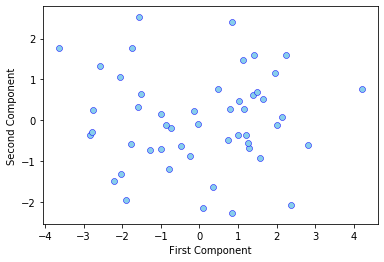

In [159]:
#(9)

# It is not recommended to use the PCA Algorithm since it calculates all the eigenvectors for the given correlation/covariance matrix
# Although we are going to use only some of these eigenvectors that corresponds to the highest eigenvalues

#(10)
U,S,V= np.linalg.svd(normalized, full_matrices=False, # It's not necessary to compute the full matrix of U or V
      )

print(U.shape)
sdv_res =-U.dot( np.diag(S) )
projected_pca =(-normalized.dot(V))
#(11)
sns.scatterplot(x=projected_pca[:,0],y=projected_pca[:,1],color="skyblue",  edgecolor='blue')
plt.xlabel('First Component')
plt.ylabel('Second Component')

#(12) The answer is in the PDF file
print(-normalized.dot(V)[:,:2])

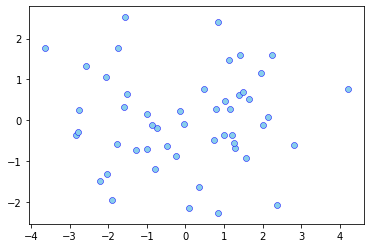

In [149]:
#USING NUMPY
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
projected = pca.fit_transform(normalized)
sns.scatterplot(x=projected[:,0],y=projected[:,1],color="skyblue",  edgecolor='blue')
#pd.DataFrame(projected)

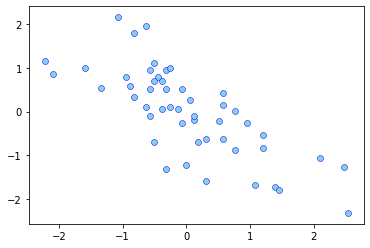

In [125]:
#Plotting the original matrix without any PCA
sns.scatterplot(x=normalized[:,0],y=normalized[:,1],color="skyblue",  edgecolor='blue')